# Laboratory exercise 4

## Warm-Up Mode (2 points)

**Task Description**  
Using the given dataset, develop and implement **3** different neural networks to predict the **air quality level**. Each network should differ in the following ways:  

- **layer configurations** - use different numbers and types of layers;
- **activation functions** - try different activation functions;
- **neurons per layer** - experiment with different numbers of neurons in each layer; and
- **number of layers** - build networks with varying depths.

After developing the models, evaluate and compare the performance of all **3** approaches.

**About the Dataset**  
This dataset focuses on air quality assessment across various regions. The dataset contains 5,000 samples and captures critical environmental and demographic factors that influence pollution levels.

**Features**:  
- **Temperature (°C)**: Average temperature of the region.  
- **Humidity (%)**: Relative humidity recorded in the region.  
- **PM2.5 Concentration (µg/m³)**: Levels of fine particulate matter.  
- **PM10 Concentration (µg/m³)**: Levels of coarse particulate matter.  
- **NO2 Concentration (ppb)**: Nitrogen dioxide levels.  
- **SO2 Concentration (ppb)**: Sulfur dioxide levels.  
- **CO Concentration (ppm)**: Carbon monoxide levels.  
- **Proximity to Industrial Areas (km)**: Distance to the nearest industrial zone.  
- **Population Density (people/km²)**: Number of people per square kilometer in the region.  

**Target Variable**: **Air Quality**  
- **Good**: Clean air with low pollution levels.  
- **Moderate**: Acceptable air quality but with some pollutants present.  
- **Poor**: Noticeable pollution that may cause health issues for sensitive groups.  
- **Hazardous**: Highly polluted air posing serious health risks to the population.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import numpy as np
from tensorflow.keras.layers import BatchNormalization, LeakyReLU

In [2]:
df = pd.read_csv("pollution_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


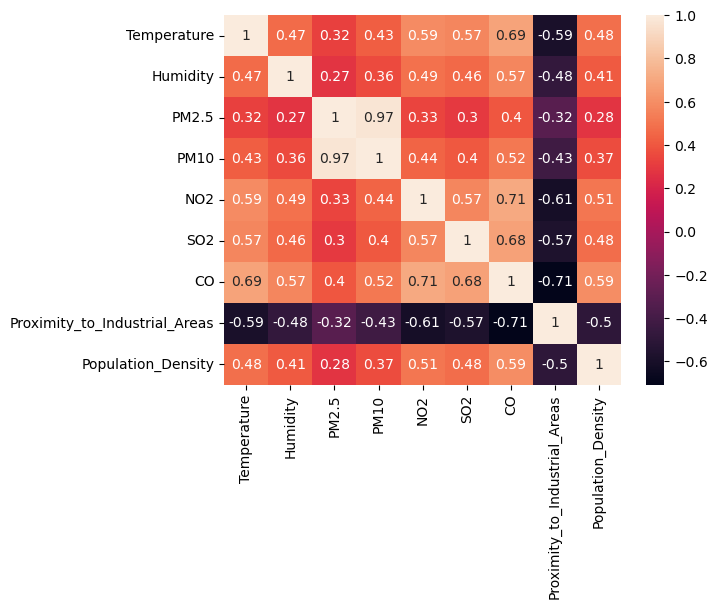

In [3]:
sns.heatmap(df.drop('Air Quality', axis=1).corr(), annot=True)
plt.show()

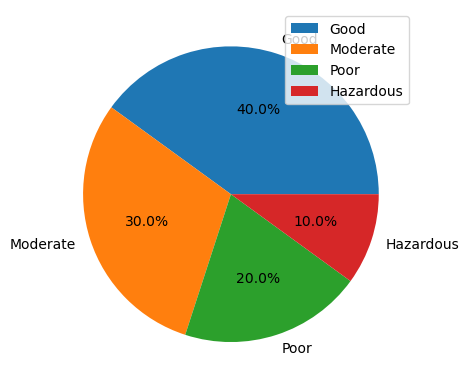

In [4]:
vals = df['Air Quality'].value_counts()
plt.pie(vals, labels=vals.index, autopct="%1.1f%%")
plt.legend()
plt.show()

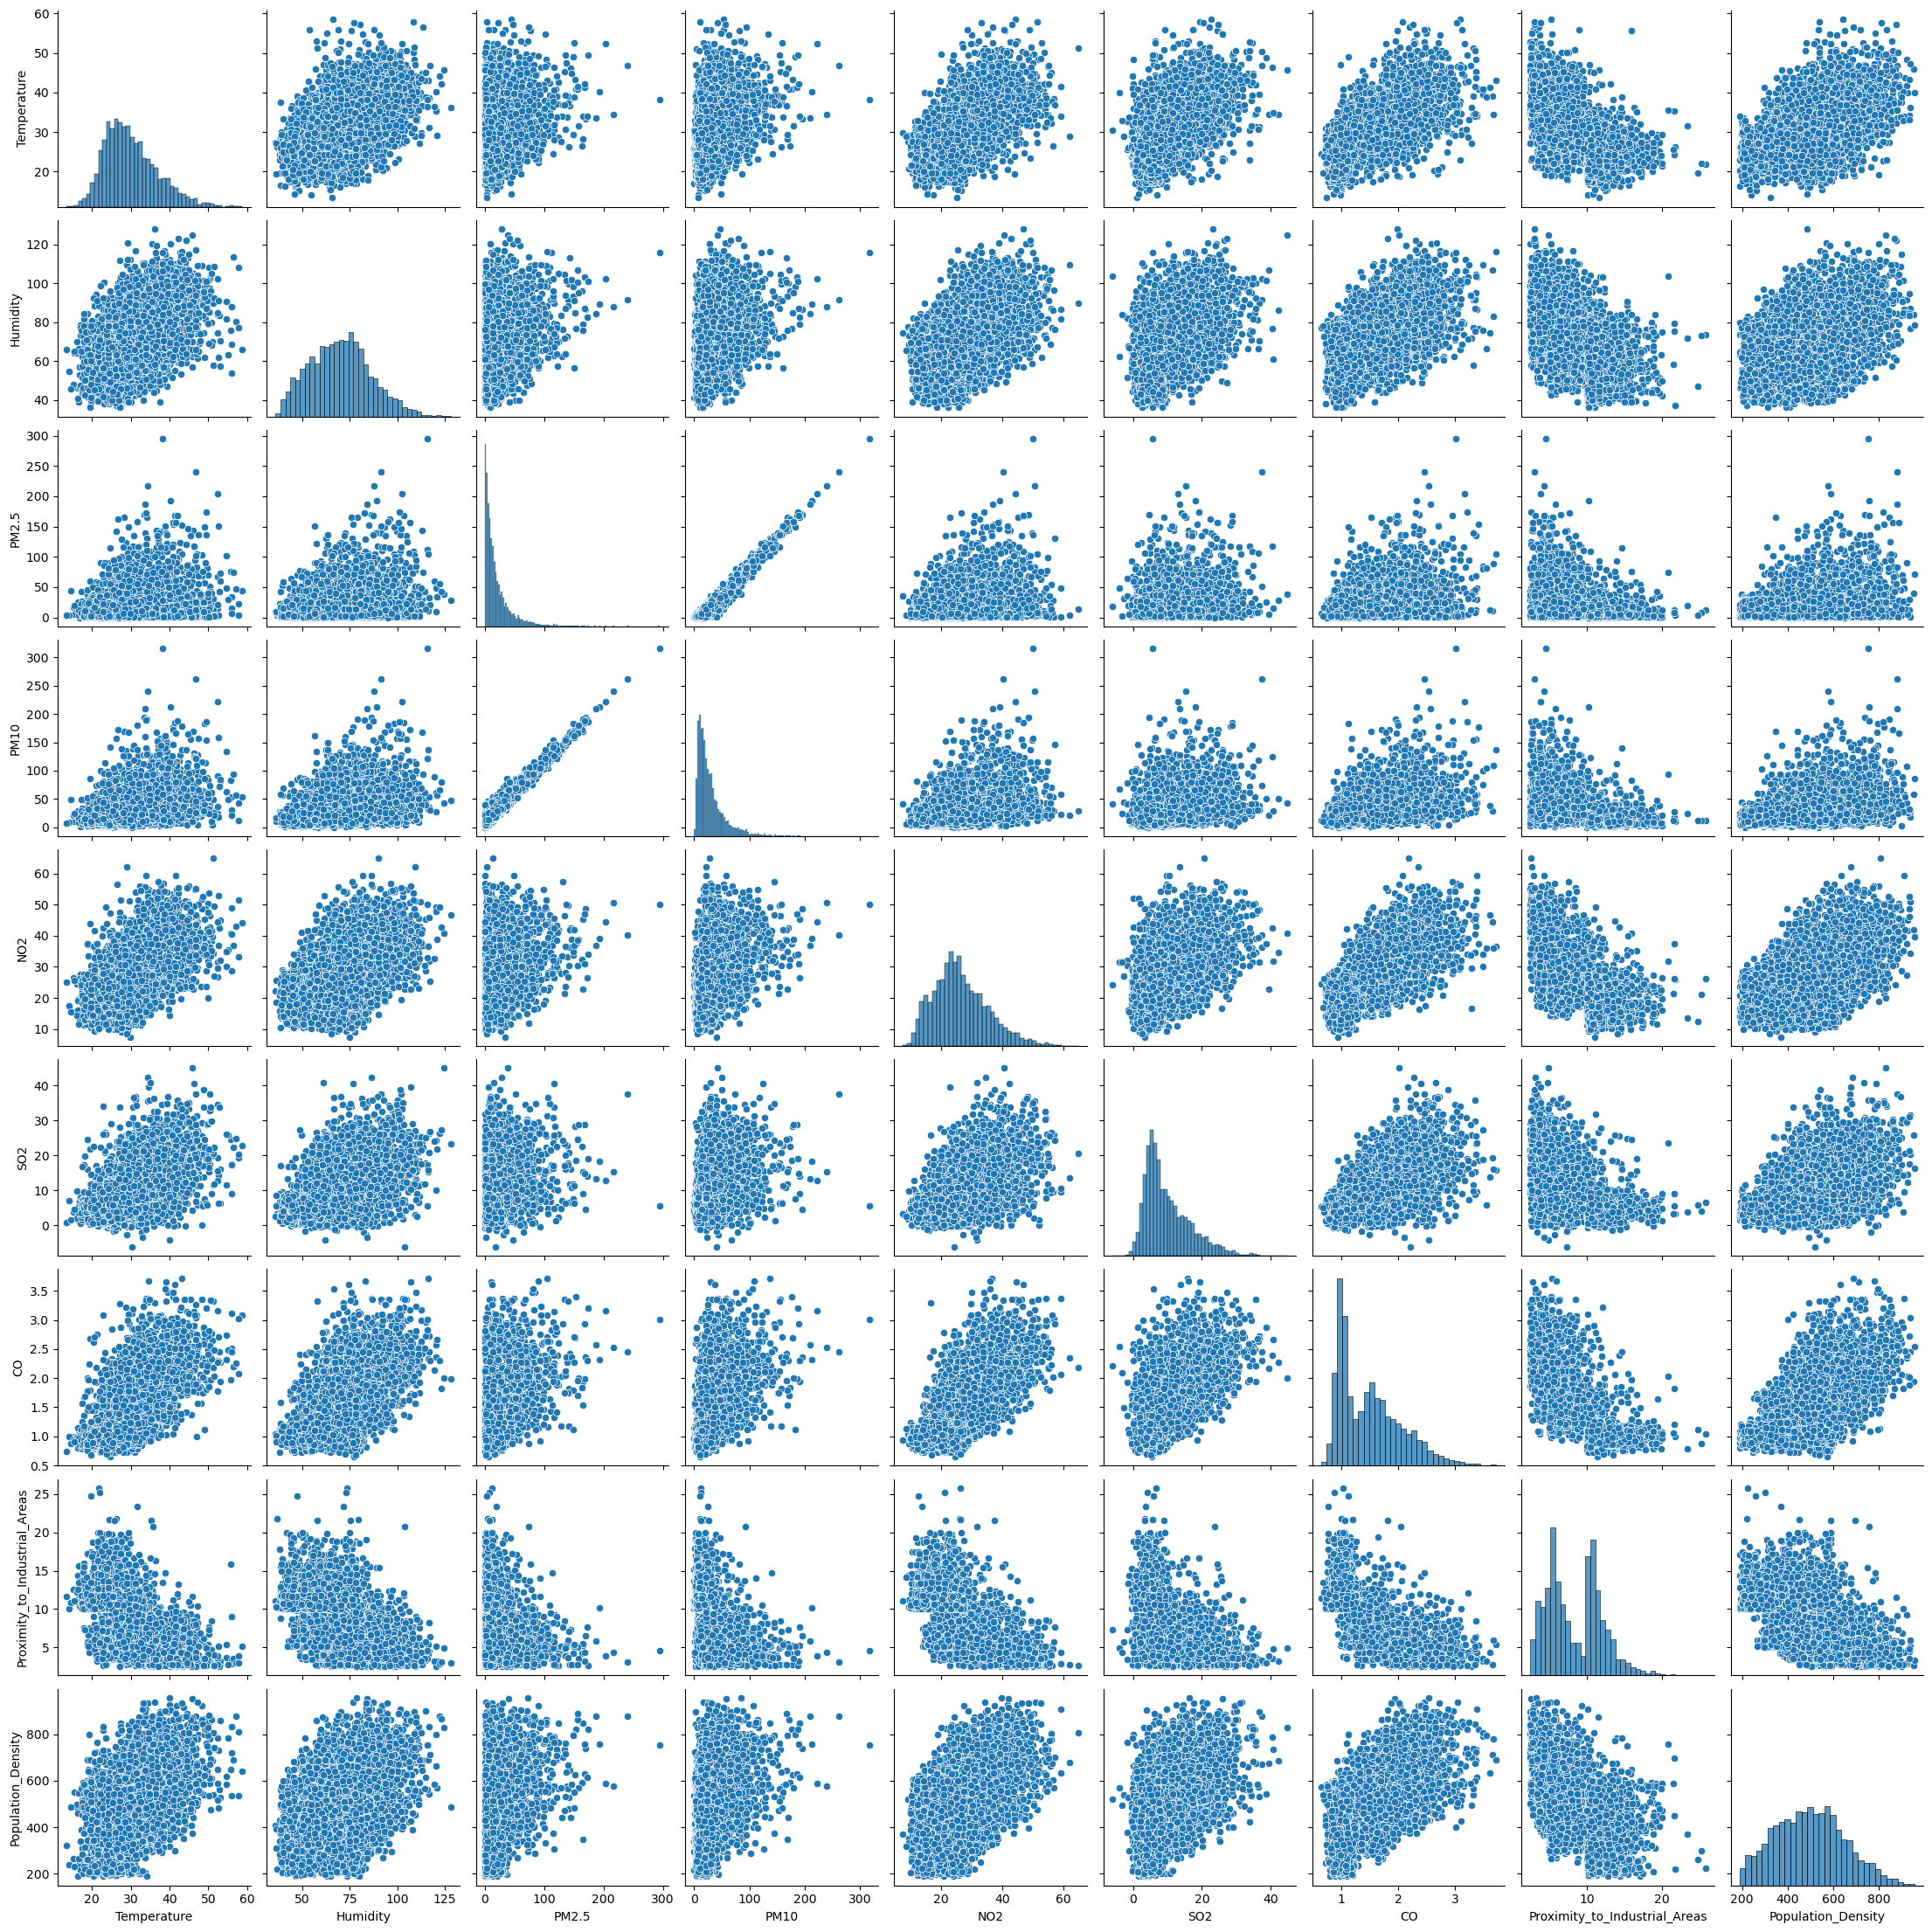

In [5]:
sns.pairplot(df)
plt.show()

In [6]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [7]:
X, Y = df.drop(columns=["Air Quality"]), pd.get_dummies(df['Air Quality'])
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [8]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
def get_report(real, predictions):
    confmat = confusion_matrix(np.argmax(real.values, axis=1), np.argmax(predictions, axis=1))
    sns.heatmap(confmat, annot=True, cmap='Blues', fmt='5.2f')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    print(classification_report(np.argmax(real.values, axis=1), np.argmax(predictions, axis=1)))

# 1st Model

In [11]:
model1 = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(Y.shape[1], activation="softmax"),
])

In [12]:
model1.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy", "precision"]
)

In [13]:
model1.fit(x_train, y_train, batch_size=8, epochs=20, validation_split=0.2)

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7034 - loss: 0.8590 - precision: 0.7817 - val_accuracy: 0.8587 - val_loss: 0.3173 - val_precision: 0.8618
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9138 - loss: 0.2561 - precision: 0.9158 - val_accuracy: 0.9200 - val_loss: 0.2159 - val_precision: 0.9200
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9127 - loss: 0.2235 - precision: 0.9138 - val_accuracy: 0.8988 - val_loss: 0.2342 - val_precision: 0.8986
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9146 - loss: 0.2119 - precision: 0.9149 - val_accuracy: 0.9212 - val_loss: 0.1898 - val_precision: 0.9212
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9234 - loss: 0.1960 - precision: 0.9234 - val_accuracy: 0.9200 - val_loss: 0.1916 - val_precision: 0.9200
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9412 - loss: 0.1653 - precision: 0.9432 - val_accuracy: 0.9162 - val_loss:

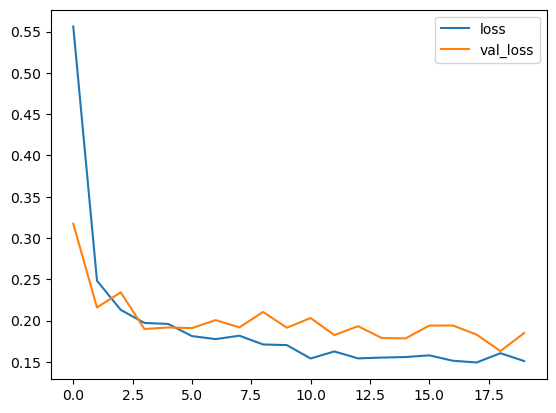

In [14]:
plt.plot(model1.history.history['loss'], label='loss')
plt.plot(model1.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [15]:
preds1 = model1.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


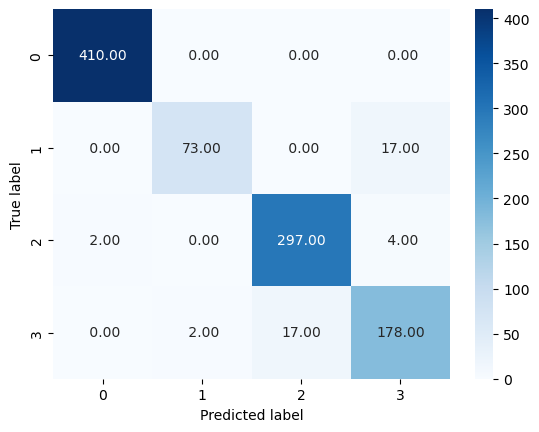

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       0.97      0.81      0.88        90
           2       0.95      0.98      0.96       303
           3       0.89      0.90      0.90       197

    accuracy                           0.96      1000
   macro avg       0.95      0.92      0.94      1000
weighted avg       0.96      0.96      0.96      1000



In [16]:
get_report(y_test, preds1)

# 2nd Model

In [18]:
model2 = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(512, activation='sigmoid'),
    Dropout(0.2),
    Dense(256, activation='sigmoid'),
    Dropout(0.3),
    Dense(Y.shape[1], activation='softmax')
])

In [19]:
model2.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy", "precision"]
)

In [20]:
model2.fit(x_train, y_train, batch_size=8, epochs=20, validation_split=0.2)

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.3686 - loss: 1.3883 - precision: 0.4107 - val_accuracy: 0.7487 - val_loss: 0.8807 - val_precision: 1.0000
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6908 - loss: 0.7280 - precision: 0.8098 - val_accuracy: 0.8875 - val_loss: 0.3755 - val_precision: 0.9020
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8563 - loss: 0.3964 - precision: 0.8715 - val_accuracy: 0.8800 - val_loss: 0.3104 - val_precision: 0.8810
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8764 - loss: 0.3228 - precision: 0.8792 - val_accuracy: 0.9137 - val_loss: 0.2461 - val_precision: 0.9136
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8909 - loss: 0.2876 - precision: 0.8929 - val_accuracy: 0.9050 - val_loss: 0.2262 - val_precision: 0.9050
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8937 - loss: 0.2757 - precision: 0.8942 - val_accuracy: 0.9112 - val_loss:

In [21]:
preds2 = model2.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


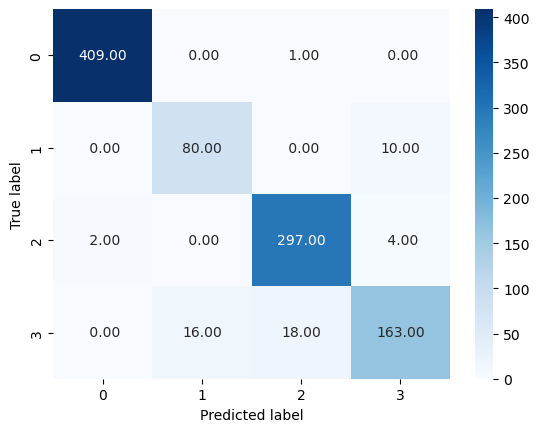

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       0.83      0.89      0.86        90
           2       0.94      0.98      0.96       303
           3       0.92      0.83      0.87       197

    accuracy                           0.95      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.95      0.95      0.95      1000



In [22]:
get_report(y_test, preds2)

In [23]:
model3 = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(256,activation='leaky_relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='tanh'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(Y.shape[1], activation='softmax')
])

In [24]:
model3.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy", "precision"]
)

In [25]:
model3.fit(x_train, y_train, batch_size=8, epochs=20, validation_split=0.2)

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.5704 - loss: 1.0608 - precision: 0.6164 - val_accuracy: 0.6475 - val_loss: 0.6929 - val_precision: 0.6854
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7232 - loss: 0.6301 - precision: 0.7591 - val_accuracy: 0.9162 - val_loss: 0.2958 - val_precision: 0.9251
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7376 - loss: 0.6094 - precision: 0.7644 - val_accuracy: 0.9075 - val_loss: 0.2716 - val_precision: 0.9152
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7678 - loss: 0.5369 - precision: 0.7935 - val_accuracy: 0.8775 - val_loss: 0.2881 - val_precision: 0.8922
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8062 - loss: 0.4656 - precision: 0.8235 - val_accuracy: 0.8737 - val_loss: 0.3135 - val_precision: 0.8817
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8121 - loss: 0.4586 - precision: 0.8255 - val_accuracy: 0.8575 - val_loss

In [26]:
preds3 = model3.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


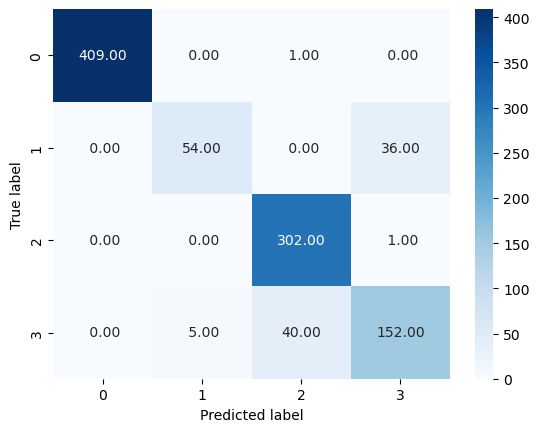

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       0.92      0.60      0.72        90
           2       0.88      1.00      0.93       303
           3       0.80      0.77      0.79       197

    accuracy                           0.92      1000
   macro avg       0.90      0.84      0.86      1000
weighted avg       0.92      0.92      0.91      1000



In [27]:
get_report(y_test, preds3)